In [63]:
# Import the needed packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('ScoobyDoo.csv')
print(df.info())



In [ ]:
df.at[0, 'imdb'] = '7.1'
df.at[1, 'imdb'] = '7.6'
df.at[2, 'imdb'] = '7.3'
df.at[3, 'imdb'] = '6.8'
df.at[4, 'imdb'] = '7.0'
df.at[5, 'imdb'] = '6.6'
df.at[6, 'imdb'] = '7.5'
df.at[7, 'imdb'] = '7.7'
df.at[8, 'imdb'] = '7.1'
df.at[9, 'imdb'] = '6.9'
df.at[10, 'imdb'] = '6.7'
df.at[11, 'imdb'] = '6.9'
df.at[12, 'imdb'] = '7.7'
df.at[13, 'imdb'] = '7.4'
df.at[14, 'imdb'] = '7.8'
 
#Filling in n/a for engagement
df.at[0, 'engagement'] = '31'
df.at[1, 'engagement'] = '38'
df.at[2, 'engagement'] = '36'
df.at[3, 'engagement'] = '28'
df.at[4, 'engagement'] = '34'
df.at[5, 'engagement'] = '30'
df.at[6, 'engagement'] = '35'
df.at[7, 'engagement'] = '29'
df.at[8, 'engagement'] = '28'
df.at[9, 'engagement'] = '27'
df.at[10, 'engagement'] = '31'
df.at[11, 'engagement'] = '28'
df.at[12, 'engagement'] = '30'
df.at[13, 'engagement'] = '28'
df.at[14, 'engagement'] = '33'
df.head()


In [ ]:
df['caught.fred'] = df['caught.fred'].fillna("False").astype(bool)
df['caught.daphnie'] = df['caught.daphnie'].fillna("False").astype(bool)
df['caught.velma'] = df['caught.velma'].fillna("False").astype(bool)
df['caught.shaggy'] = df['caught.shaggy'].fillna("False").astype(bool)
df['caught.scooby'] = df['caught.scooby'].fillna("False").astype(bool)
df['captured.fred'] = df['captured.fred'].fillna("False").astype(bool)
df['captured.daphnie'] = df['captured.daphnie'].fillna("False").astype(bool)
df['captured.velma'] = df['captured.velma'].fillna("False").astype(bool)
df['captured.scooby'] = df['captured.scooby'].fillna("False").astype(bool)
df['captured.shaggy'] = df['captured.shaggy'].fillna("False").astype(bool)
df['motive'] = df['motive'].fillna("Unknown")
df['monster.amount'] = df['monster.amount'].fillna(df['monster.amount'].mean()).astype(int)
 
df['if.it.wasnt.for'] = df['if.it.wasnt.for'].fillna("Unknown")
 
df['non-suspect'] = df['non-suspect'].fillna("False").astype(bool)
df['monster.subtype'] = df['monster.subtype'].fillna("Unknown")
df['monster.real'] = df['monster.real'].fillna("False").astype(bool)
df['monster.species'] = df['monster.species'].fillna("Unknown")
df['monster.type'] = df['monster.type'].fillna("Unknown")
df['engagement'] = df['engagement'].fillna(0).astype(int)
df['number.of.snacks'] = df['number.of.snacks'].fillna(0)
df['imdb'] = df['imdb'].fillna(0).astype(float)
 
 
 
df['split.up'] = df['split.up'].fillna(0).astype(int)
df['another.mystery'] = df['another.mystery'].fillna(0).astype(int)
df['set.a.trap'] = df['set.a.trap'].fillna(0).astype(int)
df['jinkies'] = df['jinkies'].fillna(0).astype(int)
df['my.glasses'] = df['my.glasses'].fillna(0).astype(int)
df['just.about.wrapped.up'] = df['just.about.wrapped.up'].fillna(0).astype(int)
df['zoinks'] = df['zoinks'].fillna(0).astype(int)
df['groovy'] = df['groovy'].fillna(0).astype(int)
df['scooby.doo.where.are.you'] = df['scooby.doo.where.are.you'].fillna(0).astype(int)
df['rooby.rooby.roo'] = df['rooby.rooby.roo'].fillna(0).astype(int)

print(df.info('number.of.snacks'))


In [20]:

newdf = df[['imdb', 'season', 'engagement', 'run.time', 'number.of.snacks']].copy()



newdf.loc[newdf['season'] == 'Crossover' , 'season'] = 0
newdf.loc[newdf['season'] == 'Movie' , 'season'] = 0
newdf.loc[newdf['season'] == 'Special' , 'season'] = 0

df.loc[df['number.of.snacks'] == '1 box' , 'number.of.snacks'] = 12
df.loc[df['number.of.snacks'] == '2 boxes' , 'number.of.snacks'] = 24
df.loc[df['number.of.snacks'] == '3 boxes' , 'number.of.snacks'] = 36 
df.loc[df['number.of.snacks'] == 'a couple' , 'number.of.snacks'] = 2
df.loc[df['number.of.snacks'] == 'several' , 'number.of.snacks'] = 15
df.loc[df['number.of.snacks'] == 'NULL' , 'number.of.snacks'] = 0
df.loc[df['number.of.snacks'] == 'several boxes' , 'number.of.snacks'] = 50
df.loc[df['number.of.snacks'] == 'lifetime supply' , 'number.of.snacks'] = 500
df.loc[df['number.of.snacks'] == 'truck load' , 'number.of.snacks'] = 200
df.loc[df['number.of.snacks'] == 'wheel barrel full' , 'number.of.snacks'] = 70


newdf['season'] = newdf['season'].fillna(0).astype(int)
df['number.of.snacks'] = df['number.of.snacks'].fillna(0).astype(int)
print(df.info())
print(df['number.of.snacks'].unique())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 75 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     603 non-null    int64  
 1   series.name               603 non-null    object 
 2   network                   603 non-null    object 
 3   season                    603 non-null    object 
 4   title                     603 non-null    object 
 5   imdb                      603 non-null    float64
 6   engagement                603 non-null    int64  
 7   date.aired                603 non-null    object 
 8   run.time                  603 non-null    int64  
 9   format                    603 non-null    object 
 10  monster.name              516 non-null    object 
 11  monster.gender            516 non-null    object 
 12  monster.type              603 non-null    object 
 13  monster.subtype           603 non-null    object 
 14  monster.sp

In [60]:
df['culprit.gender'].mask(df['culprit.gender'] != 'female' or 'male', 'multiple', inplace=True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [21]:
y = newdf['imdb']
vars = newdf[['season', 'engagement', 'run.time', 'number.of.snacks']]
vars = sm.add_constant(vars) 
model = sm.OLS(y, vars).fit()
predictions = model.predict(vars)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   imdb   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     8.822
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           6.33e-07
Time:                        09:49:47   Log-Likelihood:                -644.65
No. Observations:                 603   AIC:                             1299.
Df Residuals:                     598   BIC:                             1321.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.3482      0.090  

      season   average
0          1  7.379421
1          2  7.332927
2          3  7.301667
3          4  6.840000
4  Crossover  7.625000
5      Movie  6.364286
6    Special  6.869231


<AxesSubplot:title={'center':'imdb'}, xlabel='season'>

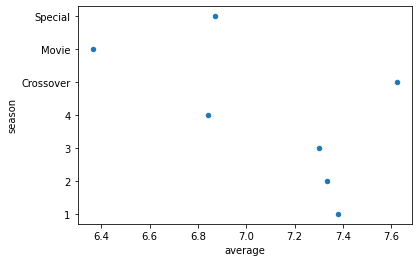

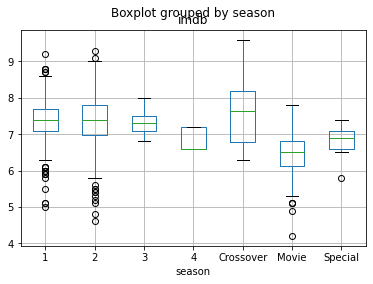

In [55]:
df2 = df.groupby(['season'], as_index=False)['imdb'].mean().rename({'imdb': 'average'}, axis=1)
df2.plot(kind = 'scatter', x ='average', y = 'season')
print(df2)

df.boxplot(column=['imdb'], by = 'season')

<AxesSubplot:xlabel='imdb', ylabel='number.of.snacks'>

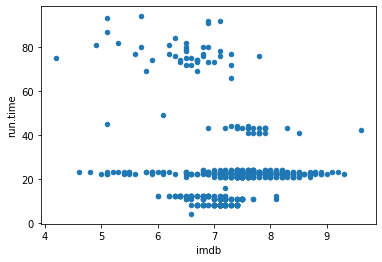

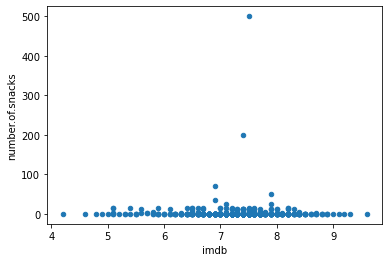

In [58]:

df.plot(kind = 'scatter', x ='imdb',  y = 'run.time')
df.plot(kind = 'scatter', x ='imdb',y ='number.of.snacks')


<AxesSubplot:xlabel='imdb', ylabel='run.time'>

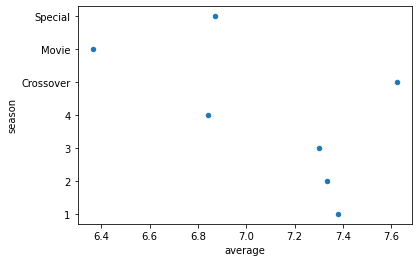

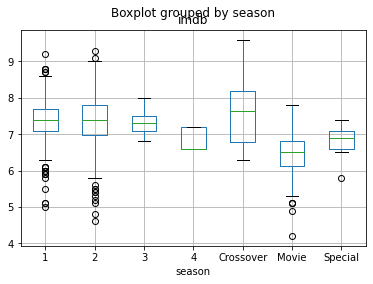

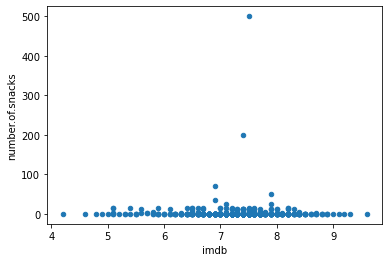

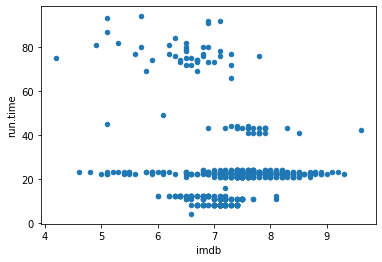

In [61]:
#Create new dataframe with average imdb rating for seasons and plot on a scatterplot
df2 = df.groupby(['season'], as_index=False)['imdb'].mean().rename({'imdb': 'average'}, axis=1)
df2.plot(kind = 'scatter', x ='average', y = 'season')
# a box plot of imdb scores by season
df.boxplot(column=['imdb'], by = 'season')
#scatter plot for imdb rating and number of snacks
df.plot(kind = 'scatter', x ='imdb',y ='number.of.snacks')
#scatter plot for imdb and run time
df.plot(kind = 'scatter', x ='imdb', y = 'run.time')


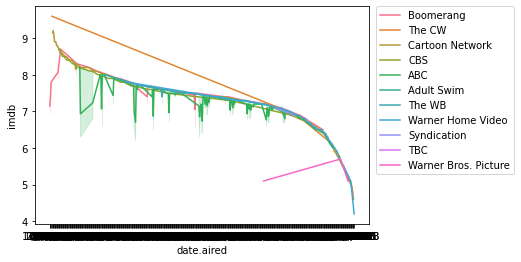

In [66]:
sns. lineplot(data = df, x='date.aired', y='imdb', hue = 'network')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left', borderaxespad=0)
plt.show()
